In this excersice, we will try to develop a machine learning model
using Python which can predict the number of calories a person has
burnt during a workout based on some biological measures.

In [3]:
#Importing the libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

cal_df = pd.read_csv('calories.csv')
exc_df = pd.read_csv('exercise.csv')
cal_df, exc_df

(        User_ID  Calories
 0      14733363     231.0
 1      14861698      66.0
 2      11179863      26.0
 3      16180408      71.0
 4      17771927      35.0
 ...         ...       ...
 14995  15644082      45.0
 14996  17212577      23.0
 14997  17271188      75.0
 14998  18643037      11.0
 14999  11751526      98.0
 
 [15000 rows x 2 columns],
         User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
 0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
 1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
 2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
 3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
 4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
 ...         ...     ...  ...     ...     ...       ...         ...        ...
 14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
 14996  1721257

In [4]:
#Merge the dataframes into a unique set
# -> We can see we have 7 features that may influence our target (calories)
df = pd.merge(exc_df, cal_df, on='User_ID', how='left')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
#check types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
#How many unique values we have in each column
df.nunique()

User_ID       15000
Gender            2
Age              60
Height           90
Weight           91
Duration         30
Heart_Rate       59
Body_Temp        45
Calories        277
dtype: int64

In [7]:
#Sting values (in Gender) cannot be interpreted as such by a ML algorithm. Make them numbers
df['Gender'] = df['Gender'].replace({'female':0, 'male':1})
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [8]:
# Gain some insights
df.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


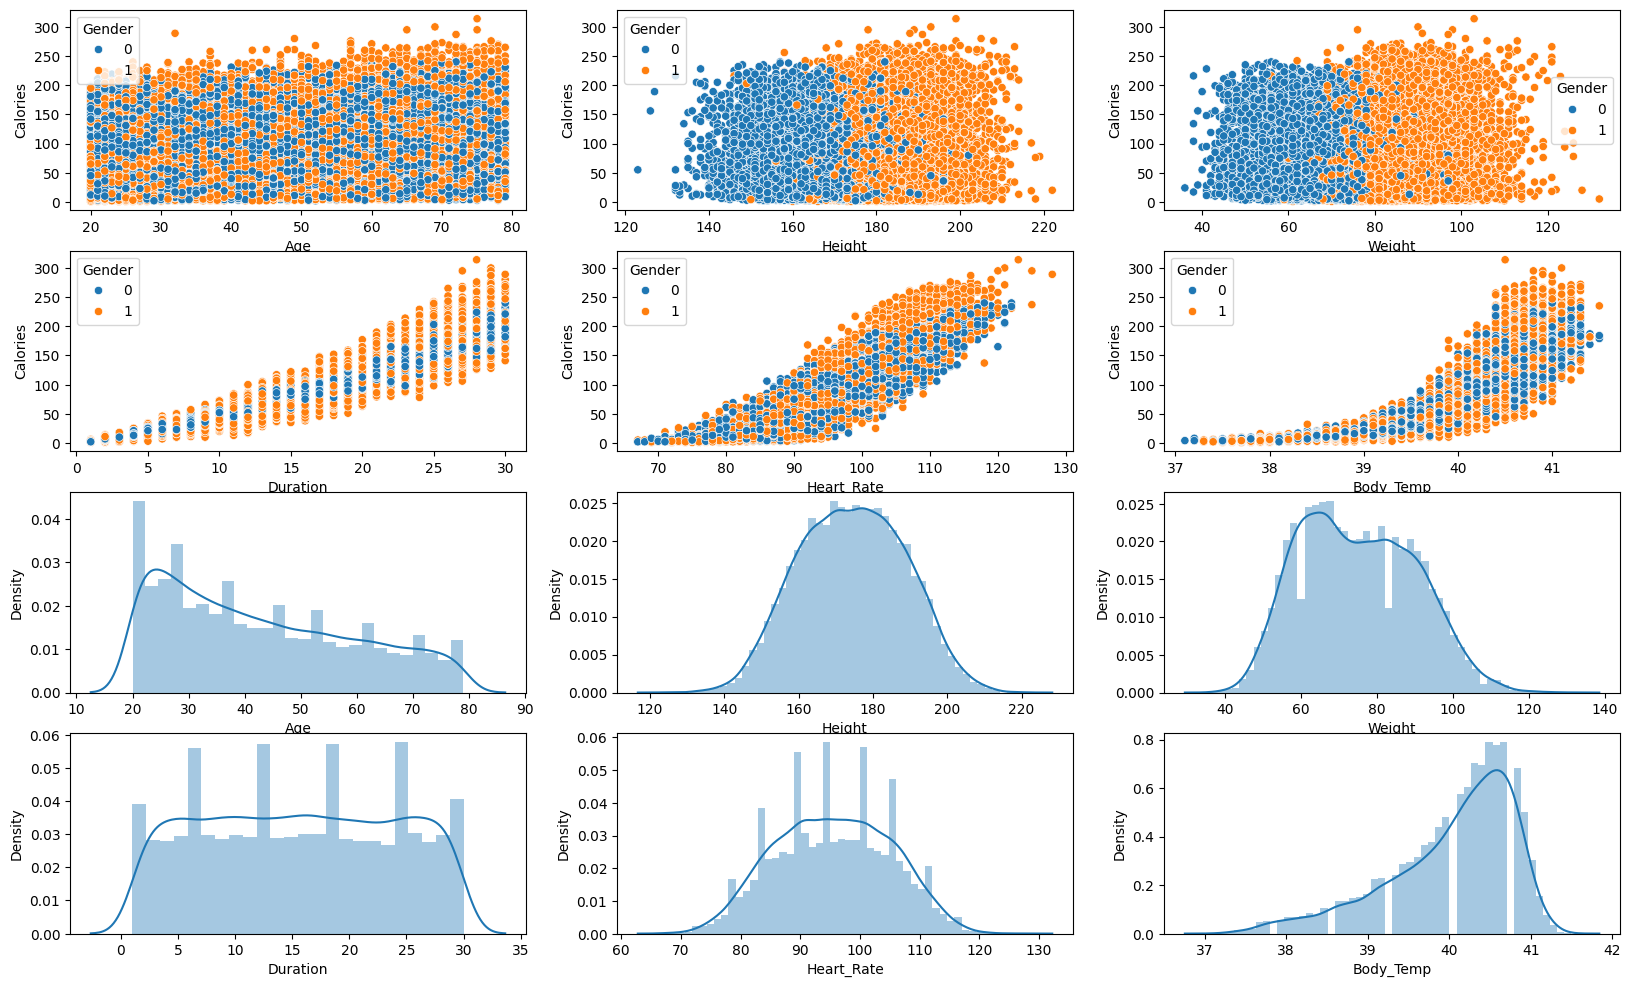

In [9]:
# Let's perform some EDA (Exploratory Data Analysis) to visualize trends/patterns/correlations
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'] 

fig, ax = plt.subplots(4, 3,figsize=(20,12))
for i,feature in enumerate(features):
    sns.scatterplot(ax = ax[i//3 , i%3], x=df[feature], y=df.Calories, hue=df.Gender)
    sns.distplot(df[feature], ax = ax[i//3+2 , i%3])

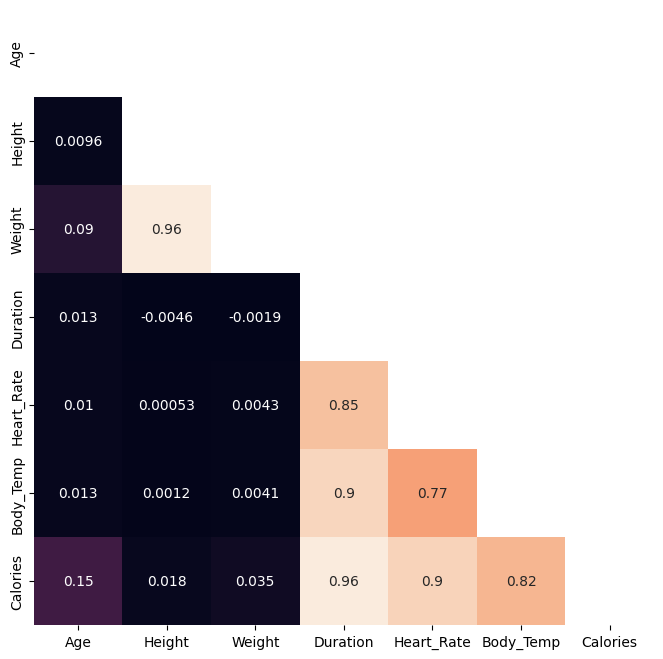

In [10]:
plt.figure(figsize=(8,8))
corr = df[features+['Calories']].corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, cbar=False, mask=matrix)
plt.show()

In [13]:
# We see high correlation between calories-Duration & height-weight. We could drop them (we will later) as
# they might imply feature leakage
#Train-test split
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(df[features], df['Calories'], test_size=0.25)
x_train.shape, x_test.shape 

((11250, 6), (3750, 6))

In [29]:
#Normalize the data
from sklearn.preprocessing import LabelEncoder, StandardScaler 

scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)
#Check how the dataset has changed (It's a numpy array -> Transform to pandas DataFrame)
pd.DataFrame(x_train)

,0,1,2,3,4,5
0,-0.752548,-0.600396,-1.133173,1.500567,1.613393,1.253457
1,0.249825,1.154591,1.325034,0.539733,-0.264511,0.355189
2,-0.929437,0.803594,0.328464,-0.060789,0.778769,-0.029783
3,-0.457732,-1.583188,-1.598239,1.620671,2.448016,1.125133
4,-0.162916,1.716187,1.989414,0.539733,0.987425,0.996809
...,...,...,...,...,...,...
11245,-1.047363,0.101599,-0.070164,0.419628,1.196081,0.611837
11246,-1.106326,-0.108999,-0.003726,1.500567,1.091753,0.868485
11247,0.072936,-0.600396,-0.468792,1.500567,1.196081,1.381781
11248,1.134272,-0.670595,-0.402354,0.299524,0.152801,0.868485


In [30]:
from sklearn.metrics import mean_absolute_error as MAE 
from sklearn.svm import SVC 
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 

In [31]:
#Build various models to try

models = { 'Linear Regression': LinearRegression(), 'XGB Regression': XGBRegressor(),
          'Lasso Regression': Lasso(), 'Random Forest Regression': RandomForestRegressor(),
          'Ridge Regression': Ridge() } 

for model_name ,model in models.items():
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    training_error = MAE(y_train, train_pred)
    test_error = MAE(y_test, test_pred)
    print(f'{model_name}')
    print(f'Training_error: {training_error}')
    print(f'Testing_error:  {test_error}')
    print('')

#XGB Regression and Random Forest Regression might have overfit!

Linear Regression
Training_error: 8.320685486267955
Testing_error:  8.43109748402928

XGB Regression
Training_error: 1.4770560762166978
Testing_error:  2.506219622659683

Lasso Regression
Training_error: 9.022125961692572
Testing_error:  9.149757449352357

Random Forest Regression
Training_error: 0.9732293333333335
Testing_error:  2.6261786666666667

Ridge Regression
Training_error: 8.320446208376698
Testing_error:  8.430712857151226



In [33]:
#Let's try to drop the two features we said before
new_features = [x for x in features if x not in ['Weight', 'Duration']]

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(df[new_features], df['Calories'], test_size=0.25)

scaler = StandardScaler() 
new_x_train = scaler.fit_transform(new_x_train) 
new_x_test = scaler.transform(new_x_test)

models = { 'Linear Regression': LinearRegression(), 'XGB Regression': XGBRegressor(),
          'Lasso Regression': Lasso(), 'Random Forest Regression': RandomForestRegressor(),
          'Ridge Regression': Ridge() } 

for model_name ,model in models.items():
    model.fit(new_x_train, new_y_train)
    new_train_pred = model.predict(new_x_train)
    new_test_pred = model.predict(new_x_test)
    training_error = MAE(new_y_train, new_train_pred)
    test_error = MAE(new_y_test, new_test_pred)
    print(f'{model_name}')
    print(f'Training_error: {training_error}')
    print(f'Testing_error:  {test_error}')
    print('')

#XGB Regression, Random Forest Regression and Ridge Regression might have overfit!

Linear Regression
Training_error: 17.968946905987657
Testing_error:  17.80327086084949

XGB Regression
Training_error: 7.743934069346719
Testing_error:  10.97876999634107

Lasso Regression
Training_error: 17.98471496599623
Testing_error:  17.840236199908464

Random Forest Regression
Training_error: 4.102343358730159
Testing_error:  11.117041498412698

Ridge Regression
Training_error: 17.969018007986318
Testing_error:  17.803503319682164



In [72]:
#Some of those models have hyper-parameters that we can tune. Let's use a Grid Search to do so.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['squared_error'], #Default "squared_error". Other options absolute_error, “friedman_mse”, “poisson”
    'n_estimators': [1,5,10,25,50,100],        # Number of trees in the forest
    'max_depth': [None,1,2,3,4,5],       # Maximum depth of each tree
    'min_samples_split': [None, 1, 2, 3, 4],      # Minimum samples required to split a node
    'min_samples_leaf': [None,1, 2, 3, 4],        # Minimum samples required to be a leaf node
    'max_features': [1]       # Number of features to consider for the best split
}

grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(x_train, y_train)

results = grid_search.cv_results_

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


In [73]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_model_train_pred = best_model.predict(x_train)
best_model_test_pred = best_model.predict(x_test)

training_error = MAE(y_train, best_model_train_pred)
test_error = MAE(y_test, best_model_test_pred)
print(training_error)
print(test_error)

model = XGBRegressor().fit(x_train, y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
training_error = MAE(y_train, train_pred)
test_error = MAE(y_test, test_pred)

print(training_error)
print(test_error)

1.6422586682261207
4.251534400000001
1.4770560762166978
2.506219622659683
